PCs:  10
PCA shape:  (3000, 10)
0.5888828439108548


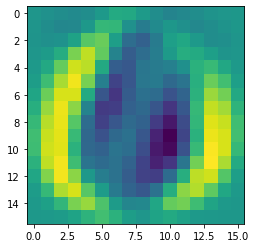

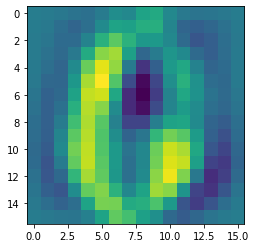

PCs:  50
PCA shape:  (3000, 50)
0.4400200712498321


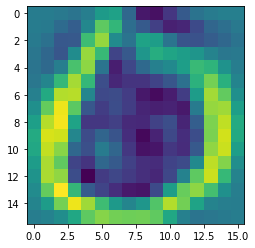

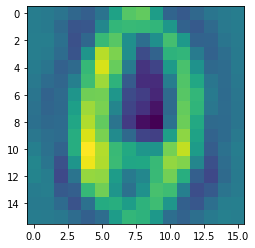

PCs:  100
PCA shape:  (3000, 100)
0.40520359692881364


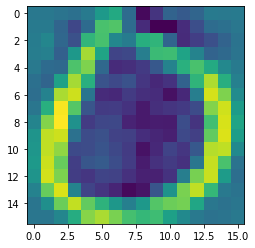

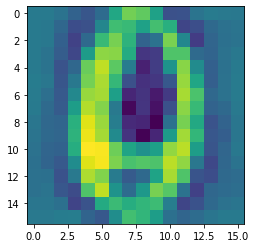

PCs:  200
PCA shape:  (3000, 200)
0.3883879744788629


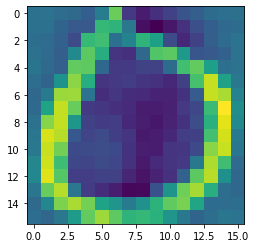

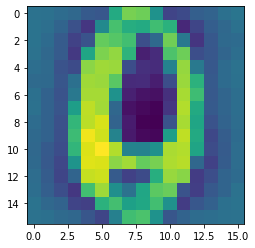

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mean_square_error(x, y):
     return (np.square(x - y)).mean()
        
def pca(X, k):
    # Data matrix X, assumes 0-centered
    n, m = X.shape
    X = X-X.mean(axis=0)

    # Compute covariance
    C = np.dot(X.T, X) / (n-1)

    e, v = np.linalg.eigh(C)
    
    # Transform X
    X_pca = np.dot(X, v[:, -k:])
    
    return X_pca, v[:, -k:]


import scipy.io as io

X = io.loadmat('USPS.mat')['A']
y = io.loadmat('USPS.mat')['L']

for i in [10, 50, 100, 200]:
    pca_res, pc = pca(X, i)
    print('PCs: ', i)
    print('PCA shape: ', pca_res.shape)

    recovered = pca_res @ pc.T
    
    print(mean_square_error(recovered, X))
    
    plt.imshow(recovered[0, :].reshape(16,16))
    plt.show()
    plt.imshow(recovered[1, :].reshape(16,16))
    plt.show()
    